### Problem: An evacuation planning problem
#### (a) Identify a minimum cost spanning tree

**Approach** : 

**For part (a)**, simply find an MST assuming the network is undirected.

**For part (b)**, we assume that the network is undirected first (or that it is directed both ways i.e. if a->b exists, we assume that b->a also exists and has the same traversal time as a->b). Using the MST from part (a) and randomly choosing a shelter node, we construct a DFS tree rooted at shelter. This will give us a tree rooted at shelter and edges pointing away from shelter to all the other nodes. Since we assumed that edges (roads) exist both ways, we are allowed to invert the edges. So, after finding the DFS tree (that has edges pointing away from shelter), we invert the edges and now all the edges point from evacuee (non-shelter nodes) towards the shelter. Therefore, adding directions to the MST using DFS gives us a unique directed path from evacuee locations to the shelter. The average time it takes for evacuees to reach the shelter nodes thus remains the same as in part (a).


#### Note: Solved with a smaller example after cell 9

In [ ]:
# Author: Vanshika Gupta
# Jointly with: Prof Chrysafis Vogiatzis 

In [1]:
# Imports
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
# Read the network
G = nx.read_weighted_edgelist("WV_edgelist.txt", create_using=nx.DiGraph)
print("Number of edges:", G.number_of_edges(), "Number of nodes: ", G.number_of_nodes())

Number of edges: 4136 Number of nodes:  2594


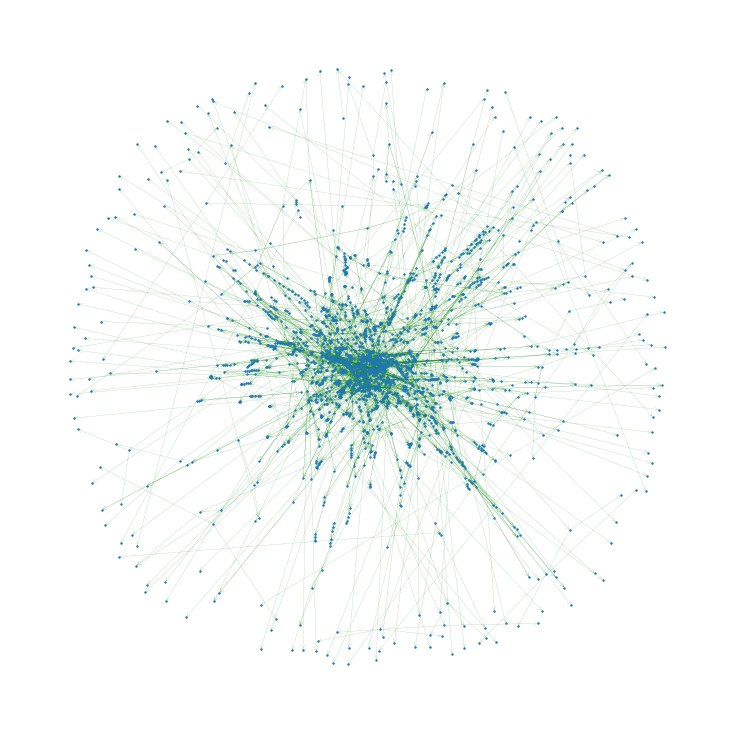

In [3]:
# Draw the network
pos = nx.spring_layout(G)
nx.draw(G, pos, arrowstyle='->', arrowsize=10, with_labels=False, node_size=2, width=0.1, edge_color='g')

In [4]:
# Find minimum spanning tree
UG = G.to_undirected()
T = nx.minimum_spanning_tree(UG) # getting the minimum cost spanning tree

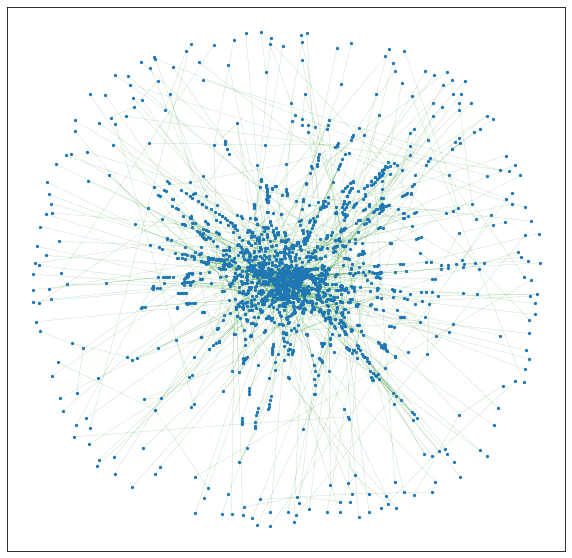

In [5]:
## Plotting only the minimum spanning tree
ered = [(i,j) for (i,j) in T.edges()]
nx.draw_networkx_nodes(UG,pos,nodelist=G.nodes(), node_size=5)
nx.draw_networkx_edges(UG,pos,edgelist=ered, edge_color='g', width=0.1)

#### (b) Formulate the problem of identifying a spanning tree of minimum cost that has the extra property that every node has only one path to safety.

In [6]:
# Get DFS Tree for directions from shelter to all nodes (desired tree is reverse of that directed tree)
shelter = '155416515'
DFS_Tree = nx.dfs_tree(T, source=shelter)

In [7]:
# Data check for number of edges
print("Edges in original Graph: ", len(G.edges()))
print("Edges in undirected graph: ", len(UG.edges()))
print("Edges in MST of undirected graph: ", len(T.edges()))
print("Edges in DFS Tree of MST: ", len(DFS_Tree.edges()))

Edges in original Graph:  4136
Edges in undirected graph:  3435
Edges in MST of undirected graph:  2593
Edges in DFS Tree of MST:  2593


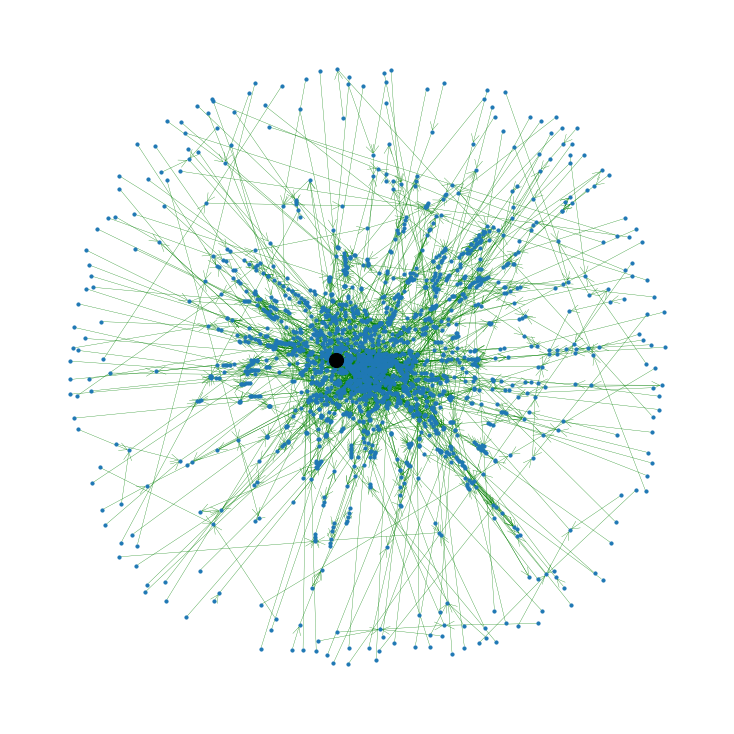

In [8]:
# Draw the tree with "single path to safety" to source
nx.draw(DFS_Tree.reverse(), pos, arrowstyle='->', arrowsize=20, with_labels=False, node_size=10, width=0.3, edge_color='g')
nx.draw_networkx_nodes(DFS_Tree.reverse(), pos, nodelist=[shelter], node_size=200, node_color='#000000')

In [9]:
# Get average shortest path from a node to the shelter
shortest_lengths = nx.single_source_dijkstra_path_length(T, shelter, cutoff=None, weight='weight')
values = shortest_lengths.values()
total_time = sum(values)
average_total_time = total_time/(G.number_of_nodes()-1)
print("\n average total time: ", average_total_time)


 average total time:  350536.90698264586


## ---------------------------------------------------------------------------
## Shorter Example using Sioux Falls Data
## ---------------------------------------------------------------------------

In [10]:
# Imports
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

In [11]:
# Read the network
G=nx.read_weighted_edgelist("SiouxFalls.txt")
print("Number of edges:", G.number_of_edges(), "Number of nodes: ", G.number_of_nodes())

Number of edges: 38 Number of nodes:  24


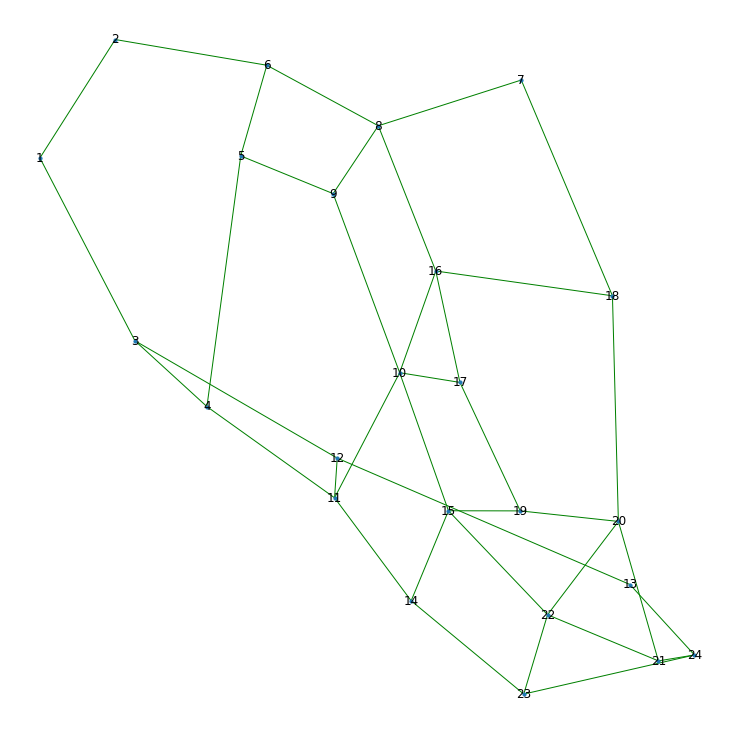

In [12]:
# Draw the network
pos = nx.spring_layout(G)
nx.draw(G, pos, arrowstyle='->', arrowsize=20, with_labels=True, node_size=10, width=1, edge_color='g')

In [13]:
# Find minimum spanning tree
UG = G.to_undirected()
T = nx.minimum_spanning_tree(UG) # getting the minimum cost spanning tree

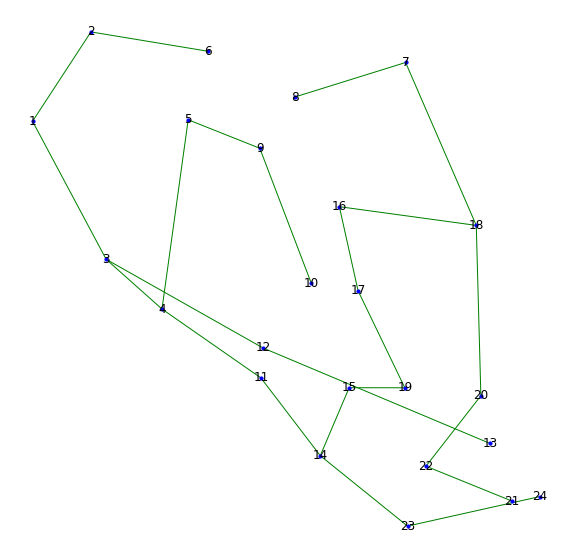

In [14]:
## Plotting only the minimum spanning tree
ered = [(i,j) for (i,j) in T.edges()]
nx.draw_networkx_nodes(UG,pos,nodelist=G.nodes(), node_color='b', node_size=10)
nx.draw(UG, pos, arrowstyle='->', arrowsize=20, with_labels=True, node_size=0, width=0, edge_color='g')
nx.draw_networkx_edges(UG,pos,edgelist=ered, edge_color='g', width=1)

In [15]:
# Get DFS Tree for directions from shelter to all nodes (desired tree is reverse of that directed tree)
DFS_Tree = nx.dfs_tree(T, source='1')

In [16]:
# Data check for number of edges
print("Edges in original Graph: ", len(G.edges()))
print("Edges in undirected graph: ", len(UG.edges()))
print("Edges in MST of undirected graph: ", len(T.edges()))
print("Edges in DFS Tree of MST: ", len(DFS_Tree.edges()))

Edges in original Graph:  38
Edges in undirected graph:  38
Edges in MST of undirected graph:  23
Edges in DFS Tree of MST:  23


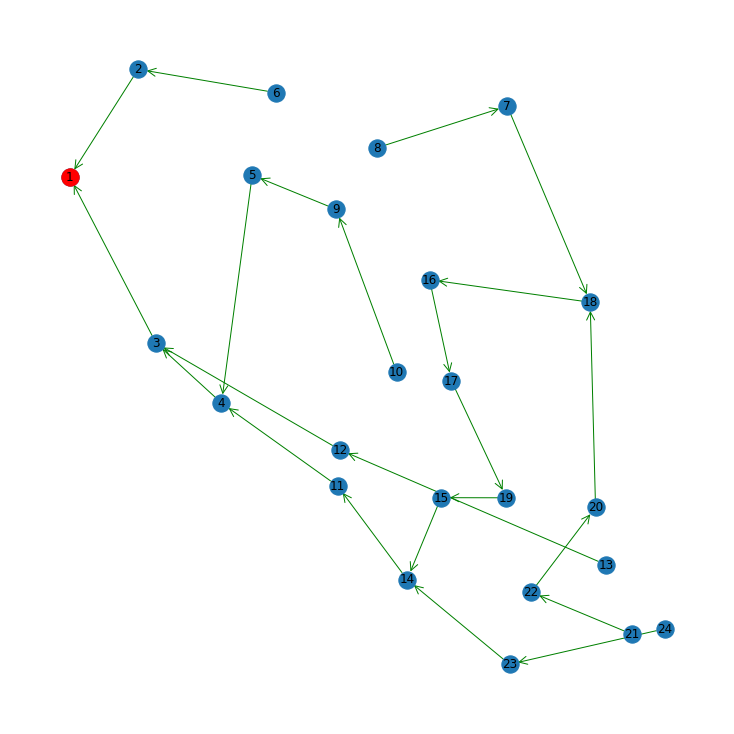

In [17]:
# Draw the tree with "single path to safety" to source
nx.draw(DFS_Tree.reverse(), pos, arrowstyle='->', arrowsize=20, with_labels=True, node_size=300, width=1, edge_color='g')
nx.draw_networkx_nodes(DFS_Tree.reverse(), pos, nodelist=['1'], node_size=300, node_color='r')

In [18]:
# Get average shortest path from a node to the shelter
shortest_lengths = nx.single_source_dijkstra_path_length(T, '1', cutoff=None, weight='weight')
print(shortest_lengths)
values = shortest_lengths.values()
total_time = sum(values)
average_total_time = total_time/(G.number_of_nodes()-1)
print("\n average total time: ", average_total_time)

{'1': 0, '3': 4.0, '2': 6.0, '4': 8.0, '12': 8.0, '5': 10.0, '13': 11.0, '6': 13.0, '11': 15.0, '9': 20.0, '10': 26.0, '14': 29.0, '23': 38.0, '15': 41.0, '24': 42.0, '19': 45.0, '17': 52.0, '16': 61.0, '18': 64.0, '7': 66.0, '20': 68.0, '8': 72.0, '22': 76.0, '21': 80.0}

 average total time:  37.17391304347826
